# Predicting Heart Disease using Machine Learning

Approach:
1. Problem Definition
2. Data 
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
> Clinical parameters of patient are given, can we predict whether patient has heart disease or not 

## 2. Data
Data is taken from Kaggle.- https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data

## 3. Evaluation
> We will try to reach 95% accuracy at predicting whether patient has heart disease or not

## 4. Features

* age (Age of the patient in years)
* sex (Male = 1/Female = 0)
* cp chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])
* trestbps resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* chol (serum cholesterol in mg/dl)
* fbs (if fasting blood sugar > 120 mg/dl)
* restecg (resting electrocardiographic results) -- Values: [normal, stt abnormality, lv hypertrophy]
* thalach: maximum heart rate achieved
* exang: exercise-induced angina (True/ False)
* oldpeak: ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
* ca: number of major vessels (0-3) colored by fluoroscopy
* thal: [normal; fixed defect; reversible defect]
* target: the predicted attribute [0 or 1]

# Preparing Tools


In [1]:
# Impoprting all tools

# EDA tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Model Evaluationns
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    RocCurveDisplay           ,
)
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    RandomizedSearchCV,
    GridSearchCV,
)

# Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_csv("heart-disease.csv")
df.shape

(303, 14)

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [8]:
df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [9]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


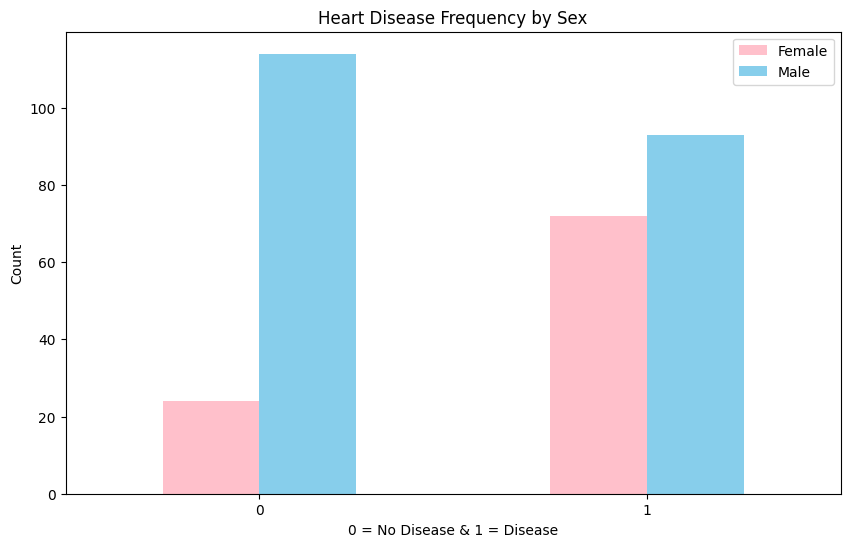

In [10]:
pd.crosstab(df["target"], df["sex"]).plot(kind="bar", figsize=(10,6), color=["pink", "skyblue"])
plt.title("Heart Disease Frequency by Sex")
plt.xlabel("0 = No Disease & 1 = Disease")
plt.ylabel("Count")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0)
plt.show()


In [11]:
df["thalach"][df["target"] == 1].value_counts()

thalach
162    8
163    7
172    7
173    6
152    6
      ..
96     1
126    1
105    1
181    1
116    1
Name: count, Length: 67, dtype: int64

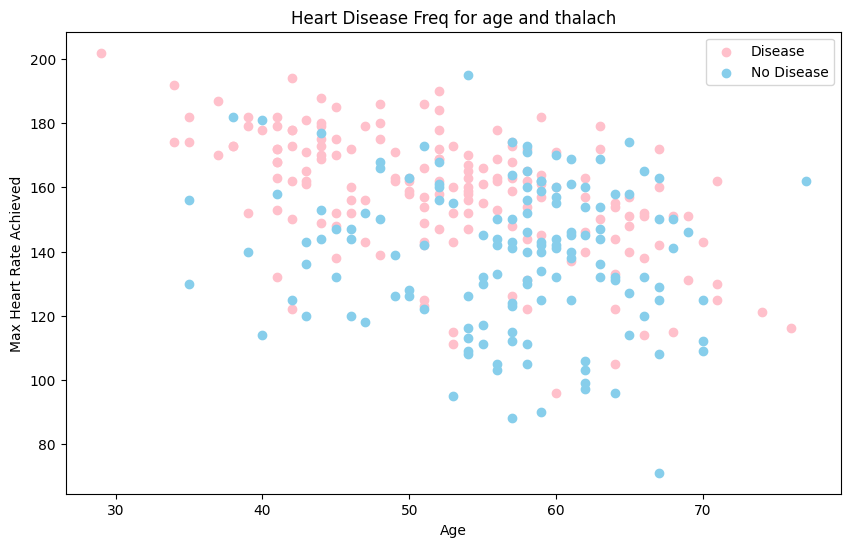

In [12]:
plt.figure(figsize=(10, 6))

plt.scatter(
    df["age"][df["target"] == 1], df["thalach"][df["target"] == 1], color=["pink"]
)
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], color="skyblue")
plt.legend(["Disease", "No Disease"])
plt.title("Heart Disease Freq for age and thalach")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate Achieved")
plt.show()

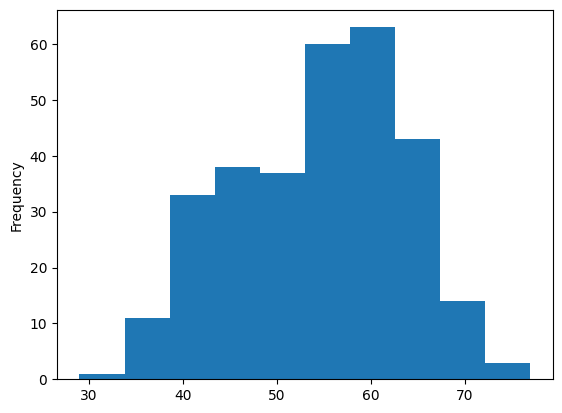

In [13]:
df.age.plot.hist();

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


##### cp -->	Description (Standard Mapping)
##### 0	 -->       Typical angina
##### 1	 -->       Atypical angina
##### 2	 -->       Non-anginal pain
##### 3  -->       Asymptomatic

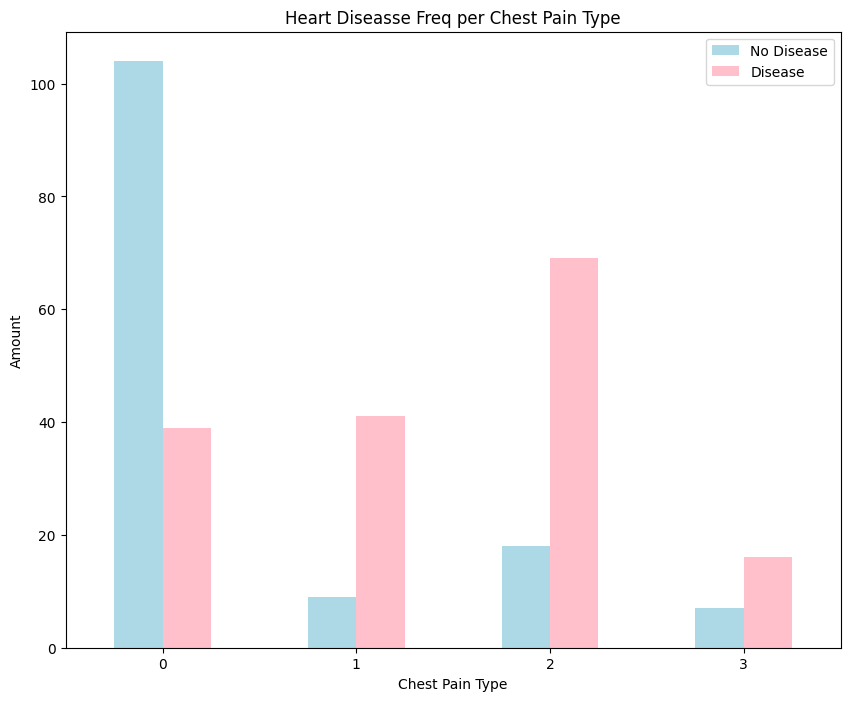

In [16]:
pd.crosstab(df.cp,df.target).plot(kind="bar",color=["lightblue","pink"],figsize=(10,8))

plt.title("Heart Diseasse Freq per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

In [17]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


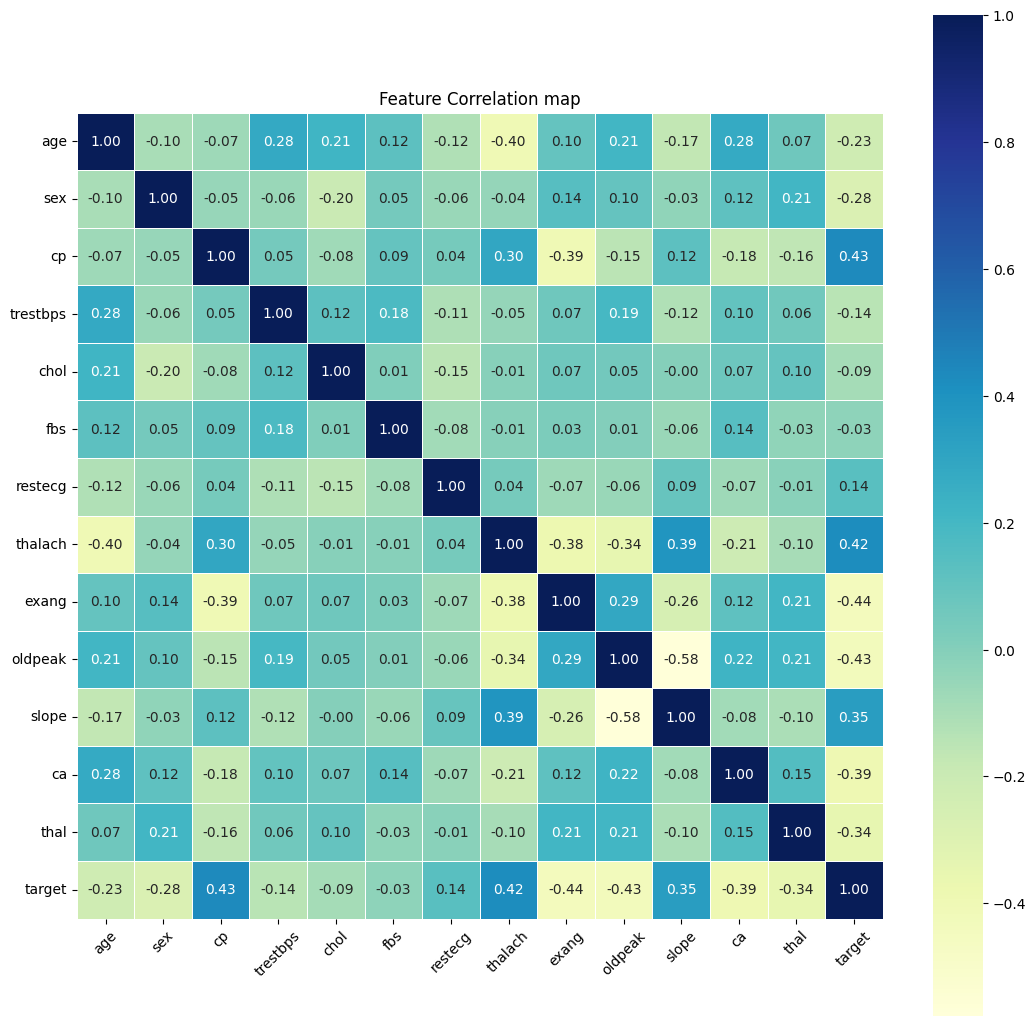

In [18]:
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, square=True)

plt.title("Feature Correlation map")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

## Modeling

In [19]:
# Split data in X & Y

X = df.drop("target",axis=1)
Y = df.target
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# Spliting data in  training and testing data

X_train,X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape, Y_train.shape , Y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [22]:
X.shape, Y.shape

((303, 13), (303,))

In [23]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}


def fit_and_score(models, X_train, X_test, Y_train, Y_test):
    """
    Trains and evaluates multiple models.
    Parameters:
    - models (dict): Dictionary of model instances.
    - X_train, X_test, Y_train, Y_test: Train/test splits.

    Returns:
    - Dictionary of model names and their test accuracy scores.
    """
    scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)             # Train the model
        score = model.score(X_test, Y_test)     # Evaluate the model
        scores[name] = round(score, 4)          # Save rounded score

    return scores


In [24]:
scores = fit_and_score(models=models, X_train=X_train, X_test=X_test, Y_train=Y_train, Y_test=Y_test)
print(scores)


k:\AI ML DS\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852, 'KNN': 0.6885, 'Random Forest': 0.8525}


                     Accuracy
Logistic Regression    0.8852
KNN                    0.6885
Random Forest          0.8525


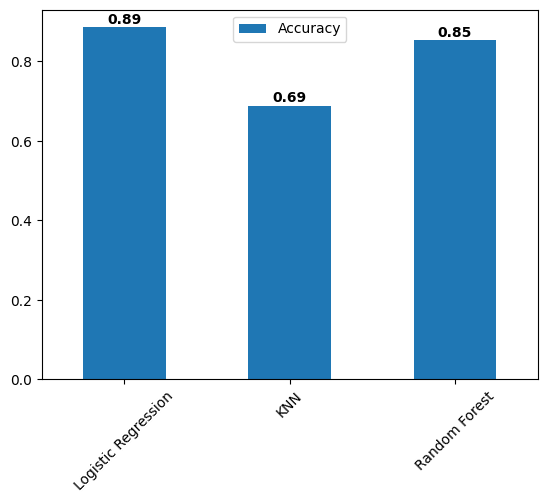

In [25]:
model_compare = pd.DataFrame(scores,index=["Accuracy"])
print(model_compare.T)
model_compare.T.plot(kind="bar")
for i, val in enumerate(model_compare.T["Accuracy"]):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontweight='bold')
plt.xticks(rotation=45)
plt.show()

## Improving Model bu Hyperparameter Tunning
1. By Hand
2. By RnadomSearchCV

In [26]:
train_scores = []
test_scores = []

# Values for n_neighbours
neighbours = range(1,21)

KNN = KNeighborsClassifier()

for i in neighbours:
    KNN.set_params(n_neighbors = i)
    
    KNN.fit(X_train,Y_train)
    
    # Update training training scores list
    train_scores.append(KNN.score(X_train,Y_train))
    
    # Update training testing scores list
    test_scores.append(KNN.score(X_test,Y_test))
    
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [27]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on test data: 75.41


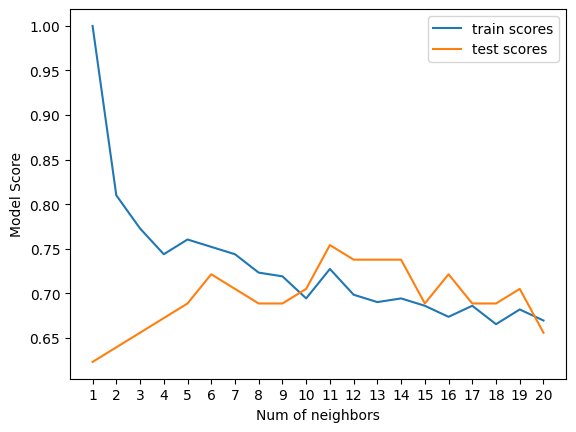

In [28]:
print(f"Maximum KNN Score on test data: {max(test_scores)*100:.2f}")

plt.plot(neighbours,train_scores,label="train scores")
plt.plot(neighbours,test_scores,label="test scores")
plt.xticks(neighbours)
plt.legend()
plt.xlabel("Num of neighbors")
plt.ylabel("Model Score")
plt.show()


# Hyperparameter Tunning using randomisedsearchCV

by tunning:
* LogisticRegression()
* RandomForestClassifier()


In [29]:
# create hyperparameter grid for LogisticRegressionn
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
# create hyperparameter grid for RandomForestClassifier
re_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}

In [30]:
# Setup Random Hyper parameter Search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),param_distributions=log_reg_grid,n_iter=20,verbose=True,cv=5,random_state=42 )

# Setup Random Hyper parameter Search for LogisticRegression
rs_log_reg.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   random_state=42, verbose=True)

In [31]:
# Finding best parameters
rs_log_reg.best_params_


{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [32]:
# getting updated scores
rs_log_reg.score(X_test,Y_test)

0.8852459016393442

In [33]:
scores

{'Logistic Regression': 0.8852, 'KNN': 0.6885, 'Random Forest': 0.8525}

* Conclusion:
* No improvement in model but got those parameters for whch model perform with 88.52 acuracy
* Parameters = {'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [34]:
# Setup Random Hyper parameter Search for RandomForrestClassiffier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),param_distributions=re_grid,n_iter=20,verbose=True,cv=5,random_state=42 )

# Fit Random Hyper parameter Search for RandomForrestClassiffier
rs_rf.fit(X_train,Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   random_state=42, verbose=True)

In [35]:
# Finding best parameters
rs_rf.best_params_

{'n_estimators': np.int64(510),
 'min_samples_split': np.int64(18),
 'min_samples_leaf': np.int64(19),
 'max_depth': 5}

In [36]:
# getting updated scores
rs_rf.score(X_test,Y_test)

0.8688524590163934

In [37]:
scores

{'Logistic Regression': 0.8852, 'KNN': 0.6885, 'Random Forest': 0.8525}

- Conclusion:
- Slight improvement in model (to find patterrns in data) and the parameters for whch model perform with 86.88 acuracy
- Parameters = {'n_estimators': np.int64(310),
-  'min_samples_split': np.int64(2),
-  'min_samples_leaf': np.int64(19),
-  'max_depth': 5}
-

# Tunning Model with GridSearchCV

In [38]:
# Diff LogisticRegresson hyperparameters
log_re_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(
    LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True
)
# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [40]:
gs_log_reg.score(X_test,Y_test)

0.8852459016393442

# Evaluating classification model
* ROC curve & AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

In [41]:
# Make preidctions on test data
y_preds = gs_log_reg.predict(X_test)

In [42]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [43]:
Y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

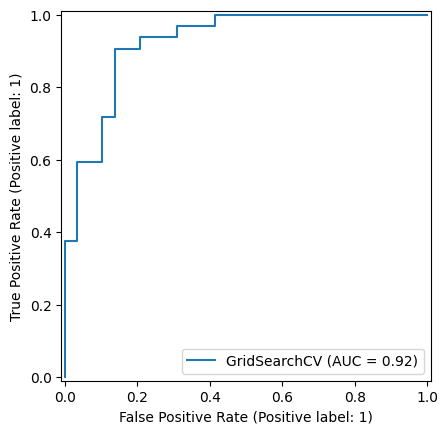

In [44]:
# from_estimator() = use a model to plot ROC curve on data
RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                               X=X_test, 
                               y=Y_test); 

In [45]:
# Display confusion matrix
print(confusion_matrix(Y_test, y_preds))

[[25  4]
 [ 3 29]]


Text(50.722222222222214, 0.5, 'predicted label')

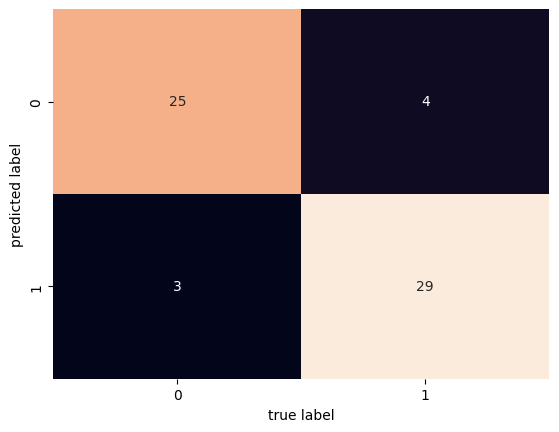

In [46]:
sns.heatmap(confusion_matrix(Y_test, y_preds),
                     annot=True, # Annotate the boxes
                     cbar=False)
plt.xlabel("true label")
plt.ylabel("predicted label")

In [47]:
# Show classification report
print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [48]:
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [49]:
clf = LogisticRegression(C=0.23357214690901212,
                         solver="liblinear")

In [50]:

# Cross-validated accuracy score
cv_acc = cross_val_score(clf,
                         X,
                         Y,
                         cv=5, # 5-fold cross-validation, this is the default
                         scoring="accuracy") # accuracy as scoring
cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [51]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [52]:
# Cross-validated precision score
cv_precision = np.mean(cross_val_score(clf,
                                       X,
                                       Y,
                                       cv=5, # 5-fold cross-validation
                                       scoring="precision")) # precision as scoring
cv_precision

np.float64(0.8215873015873015)

In [53]:
# Cross-validated recall score
cv_recall = np.mean(cross_val_score(clf,
                                    X,
                                    Y,
                                    cv=5, # 5-fold cross-validation
                                    scoring="recall")) # recall as scoring
cv_recall

np.float64(0.9272727272727274)

In [54]:
# Cross-validated F1 score
cv_f1 = np.mean(cross_val_score(clf,
                                X,
                                Y,
                                cv=5, # 5-fold cross-validation
                                scoring="f1")) # f1 as scoring
cv_f1

np.float64(0.8705403543192143)

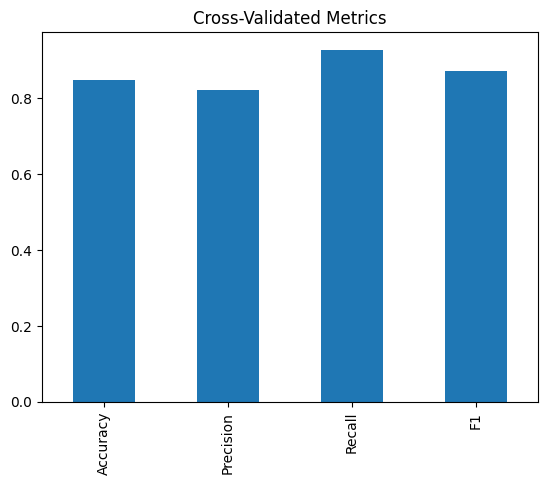

In [55]:
# Visualizing cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                            "Precision": cv_precision,
                            "Recall": cv_recall,
                            "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-Validated Metrics", legend=False);

# ------------- THE END -----------------